In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import sklearn
print(sklearn.__version__)
# !pip install seaborn
import seaborn as sns
print(sns.__version__)  # Should print the version (e.g., '0.12.2')

1.6.1
0.13.2


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_shape = train_images.shape
train_images.shape

(60000, 28, 28)

# Create the validation test and the new training data

In [4]:
# Define the split index
split_index = int(0.8 * len(train_images))  # 80% for training, 20% for validation

# Partition the data
partial_train_data = train_images[:split_index]
partial_train_labels = train_labels[:split_index]
validation_data = train_images[split_index:]
validation_labels = train_labels[split_index:]


In [5]:
names =	['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
def show_image(im):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()

In [7]:
def show_image_label(im,value,names):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()
  print("the fashion is ",names[value])

In [8]:
def show_image_vpp(im,value,prediction,probability):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()
  print("the value is ",names[value])
  print("The predicted value is ",names[prediction]," with probability: ",probability)

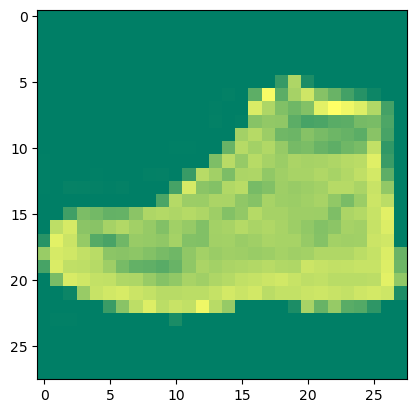

the fashion is  Ankle boot


In [9]:
show_image_label(test_images[28],test_labels[28],names)

# Define a function to build a CNN model

In [10]:
def build_model(input_shape):
    input = keras.Input(shape=(input_shape[1],input_shape[2],1))
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(input)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.Flatten()(x)
    output = layers.Dense(10, activation="softmax")(x)
    model = keras.Model(inputs=input,outputs=output)
    return model

# Define a function to train a model with callback for early stopping

In [11]:
def train_model(model,train_tensors,train_labels,val_inputs,val_outputs,nb_epochs):
    callbacks_list = [
        keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=2,mode="max")
    ]
    model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model.fit(val_inputs,val_outputs,callbacks=callbacks_list,epochs=nb_epochs,batch_size=512,validation_data=(val_inputs,val_outputs))

# Define a function to predict the fashion type and the probability of the prediction

In [12]:
def predict(model,test_tensors):
    mpredictions = model.predict(test_tensors)
    digit_predictions = np.array([x.argmax() for x in mpredictions])
    digit_probability = np.array([mpredictions[i][p] for i, p in enumerate(digit_predictions)])
    return digit_predictions,digit_probability

# Define the training and validation tensors

In [13]:
test_shape = test_images.shape
train_tensors = train_images.reshape((train_shape[0], train_shape[1], train_shape[2], 1)).astype("float32") / 255
test_tensors = test_images.reshape((test_shape[0], test_shape[1], test_shape[2], 1)).astype("float32") / 255

# Build the model

In [14]:
model = build_model(train_images.shape)

# Print a summary of the model

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

# Train the model

In [16]:
history = train_model(model, train_images, train_labels, validation_data, validation_labels, nb_epochs=20)

Epoch 1/20
24/24 [==============================] - 5s 151ms/step - loss: 5.0559 - accuracy: 0.5612 - val_loss: 0.7097 - val_accuracy: 0.7290
Epoch 2/20
24/24 [==============================] - 3s 117ms/step - loss: 0.6835 - accuracy: 0.7567 - val_loss: 0.5658 - val_accuracy: 0.7938
Epoch 3/20
24/24 [==============================] - 4s 171ms/step - loss: 0.6019 - accuracy: 0.7876 - val_loss: 0.4714 - val_accuracy: 0.8307
Epoch 4/20
24/24 [==============================] - 3s 130ms/step - loss: 0.5998 - accuracy: 0.7952 - val_loss: 0.6677 - val_accuracy: 0.7532
Epoch 5/20
24/24 [==============================] - 3s 126ms/step - loss: 0.5012 - accuracy: 0.8213 - val_loss: 0.4315 - val_accuracy: 0.8399
Epoch 6/20
24/24 [==============================] - 3s 145ms/step - loss: 0.4121 - accuracy: 0.8468 - val_loss: 0.6098 - val_accuracy: 0.8083
Epoch 7/20
24/24 [==============================] - 3s 115ms/step - loss: 0.4094 - accuracy: 0.8495 - val_loss: 0.8300 - val_accuracy: 0.7583


# Evaluate how good the model is on the testing data

In [17]:
test_loss, test_accuracy = model.evaluate(test_tensors, test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 [==============================] - 3s 7ms/step - loss: 2.2605 - accuracy: 0.6461
Test Accuracy: 0.6461
Test Loss: 2.2605


313/313 [==============================] - 2s 5ms/step


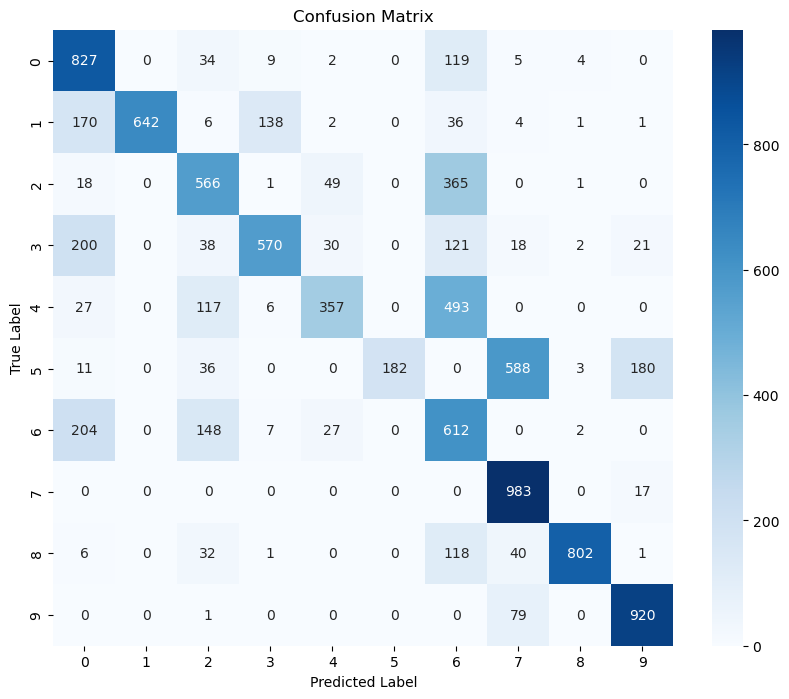

In [ ]:
# !pip install scikit-learn
# !pip install seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = np.argmax(model.predict(test_tensors), axis=1)
cm = confusion_matrix(test_labels, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predictions, target_names=names))

              precision    recall  f1-score   support

 T-shirt/top       0.57      0.83      0.67      1000
     Trouser       1.00      0.64      0.78      1000
    Pullover       0.58      0.57      0.57      1000
       Dress       0.78      0.57      0.66      1000
        Coat       0.76      0.36      0.49      1000
      Sandal       1.00      0.18      0.31      1000
       Shirt       0.33      0.61      0.43      1000
     Sneaker       0.57      0.98      0.72      1000
         Bag       0.98      0.80      0.88      1000
  Ankle boot       0.81      0.92      0.86      1000

    accuracy                           0.65     10000
   macro avg       0.74      0.65      0.64     10000
weighted avg       0.74      0.65      0.64     10000

